# Elastic Net

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [4]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [5]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [6]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target- y_pred)),e1_term), e2_term), 0)

In [7]:
init = tf.global_variables_initializer()
session.run(init)

In [8]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [9]:
loss_vec = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.74697614]
 [0.5154729 ]
 [1.2540225 ]], b = [[-0.25254747]]Loss: [3.0685976]
Paso #200A = [[0.8936755 ]
 [0.43354434]
 [1.0941019 ]], b = [[-0.18169326]]Loss: [2.401432]
Paso #300A = [[0.9933284 ]
 [0.39666912]
 [0.96595615]], b = [[-0.11994478]]Loss: [2.0156589]
Paso #400A = [[1.0505579 ]
 [0.3800822 ]
 [0.85715294]], b = [[-0.06807189]]Loss: [1.9624405]
Paso #500A = [[1.0870284 ]
 [0.38038838]
 [0.7642895 ]], b = [[-0.02056528]]Loss: [1.6867502]
Paso #600A = [[1.1021223 ]
 [0.38159966]
 [0.68053514]], b = [[0.02128363]]Loss: [1.664568]
Paso #700A = [[1.1104743 ]
 [0.39101171]
 [0.6068288 ]], b = [[0.06163171]]Loss: [1.5249285]
Paso #800A = [[1.1113749]
 [0.4059172]
 [0.5414247]], b = [[0.1001628]]Loss: [1.5240486]
Paso #900A = [[1.1040583 ]
 [0.4191634 ]
 [0.48143983]], b = [[0.13660221]]Loss: [1.3970176]
Paso #1000A = [[1.0975734 ]
 [0.43407416]
 [0.42631954]], b = [[0.17288697]]Loss: [1.4293066]


In [21]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("y="+str(slope[0][0])+"x1+"+str(slope[1][0])+"x2+"+str(slope[2][0])+"x3+"+str(intercept))

y=1.0975734x1+0.43407416x2+0.42631954x3+0.17288697


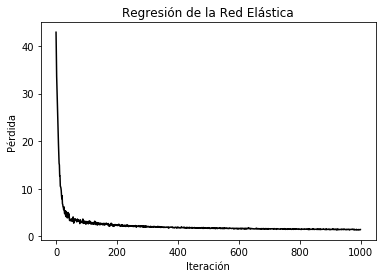

In [22]:
plt.plot(loss_vec, 'k-')
plt.title("Regresión de la Red Elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.show()